# Table of Contents
 <p>

In [1]:
%matplotlib inline

import matplotlib
import pandas as pd


In [2]:
df = pd.read_excel('./invest.xlsx', index_col=[0,1,2])

In [3]:
df

perc  amount
investment cat1     cat2                 
inv1       NaN      NaN       NaN     100
           country  US        0.2     NaN
                    Canada    0.1     NaN
                    Germany   0.4     NaN
                    Brazil    0.3     NaN
           industry solar     0.1     NaN
                    tech      0.1     NaN
                    manf      0.4     NaN
                    music     0.4     NaN
inv2       industry music     NaN     891
           country  US        0.2     NaN
                    Canada    0.1     NaN
                    Germany   0.4     NaN
                    Brazil    0.3     NaN
           industry solar     0.1     NaN
                    tech      0.1     NaN
                    manf      0.4     NaN
                    music     0.4     NaN

In [4]:
investments = df.index.levels[0].tolist()

In [5]:
rows = []
for investment in investments:
    value = df.loc[investment]['amount'].dropna().values[0]
    countries = df.loc[investment,'country']['perc'].to_dict()
    industries = df.loc[investment,'industry']['perc'].to_dict()
    for cntry, prcnt_c in countries.items():
        for ind, prcnt_i in industries.items():
            rows.append({'inv': investment, 'cntry': cntry, 'ind': ind, 'amnt': prcnt_c * prcnt_i * value})

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.


In [6]:
results = pd.DataFrame(data=rows, columns=['inv', 'cntry', 'ind', 'amnt'])

In [7]:
results

,inv,cntry,ind,amnt
0,inv1,Germany,solar,4.00
1,inv1,Germany,music,16.00
2,inv1,Germany,tech,4.00
3,inv1,Germany,manf,16.00
4,inv1,US,solar,2.00
5,inv1,US,music,8.00
6,inv1,US,tech,2.00
7,inv1,US,manf,8.00
8,inv1,Canada,solar,1.00
9,inv1,Canada,music,4.00


In [8]:
by_cntry = results.groupby('cntry').sum()

In [15]:
by_cntry

,amnt
cntry,
Brazil,297.3
Canada,99.1
Germany,396.4
US,198.2


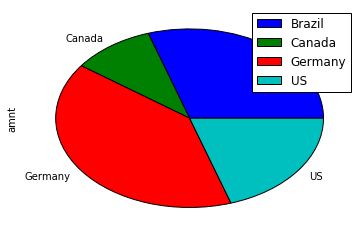

In [10]:
by_cntry.plot(kind='pie', y='amnt')

In [11]:
by_ind = results.groupby('ind').sum()

In [12]:
by_ind

,amnt
ind,
manf,396.4
music,396.4
solar,99.1
tech,99.1


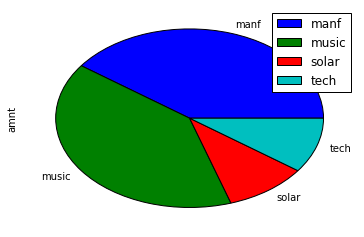

In [13]:
by_ind.plot(kind='pie', y='amnt')